In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
%cd results

/Users/xupengwei/Documents/GradStudy/2022 Fall/EECS 553/project/Workspace/Reproduce on AMRC/results


In [2]:
def bounds(RUt, delta):
    T = np.arange(1, RUt.shape[0] + 1)
    dev = np.sqrt(2 * np.log(1 / delta) * T)
    return (RUt.cumsum() + dev) / T

# Usenet1

In [23]:
data = scipy.io.loadmat('usenet1_result.mat')
mistakes_ran = data['mistakes_idx_rnd'].reshape(-1,1)
mistakes_det = data['mistakes_idx_det'].reshape(-1,1)
RUt = data['RUt'].reshape(-1,1)
data_usenet_dwm = scipy.io.loadmat("usenet1_dwm.mat")
mistakes_dwm = data_usenet_dwm['mistakes'].reshape(-1,1)[1:]

In [26]:
mistakes_ran.mean()

0.3642428285523682

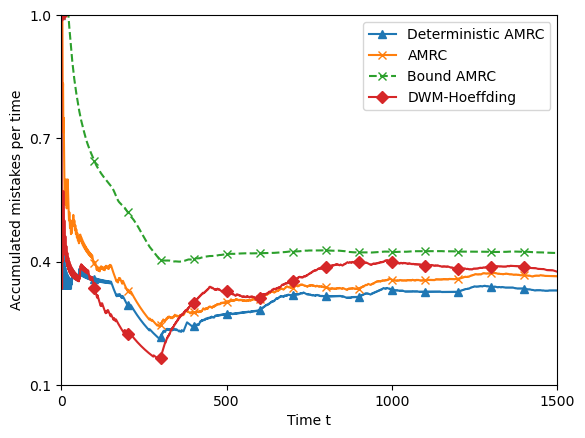

In [14]:
T = np.arange(1, mistakes_det.shape[0]+1)
plt.plot(mistakes_det.cumsum() / T, "-^", label="Deterministic AMRC", markevery=100)
plt.plot(mistakes_ran.cumsum() / T, "-x", label="AMRC", markevery=100)
plt.plot(bounds(RUt, delta=0.05), '--x', label="Bound AMRC", markevery=100)
T = np.arange(1, mistakes_dwm.shape[0]+1)
plt.plot(mistakes_dwm.cumsum() / T, "-D", label="DWM-Hoeffding", markevery=100)
plt.ylim(0.1, 1)
plt.yticks([0.1, 0.4, 0.7, 1])
plt.xlim(0,T[-1])
plt.xticks([0, 500, 1000, 1500])
plt.legend()
plt.ylabel("Accumulated mistakes per time")
plt.xlabel("Time t")
plt.savefig("usenet1.svg")
plt.savefig("usenet1.pdf")
plt.show()

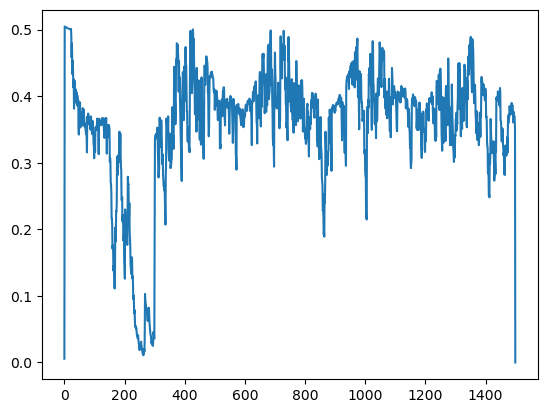

In [5]:
plt.plot(RUt)

# German

In [19]:
data = scipy.io.loadmat('german_result.mat')
mistakes_ran = data['mistakes_idx_rnd'].reshape(-1,1)
mistakes_det = data['mistakes_idx_det'].reshape(-1,1)
RUt = data['RUt'].reshape(-1,1)
data_usenet_dwm = scipy.io.loadmat("german_dwm.mat")
mistakes_dwm = data_usenet_dwm['mistakes'].reshape(-1,1)[1:]

In [22]:
mistakes_ran.mean()

0.31431431431431434

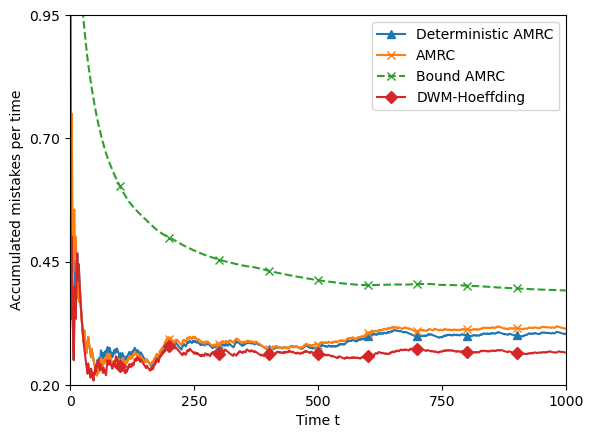

In [16]:
T = np.arange(1, mistakes_det.shape[0]+1)
plt.plot(mistakes_det.cumsum() / T, "-^", label="Deterministic AMRC", markevery=100)
plt.plot(mistakes_ran.cumsum() / T, "-x", label="AMRC", markevery=100)
plt.plot(bounds(RUt, delta=0.05), '--x', label="Bound AMRC", markevery=100)
T = np.arange(1, mistakes_dwm.shape[0]+1)
plt.plot(mistakes_dwm.cumsum() / T, "-D", label="DWM-Hoeffding", markevery=100)
plt.ylim(0.2, 0.95)
plt.yticks([0.2, 0.45, 0.7, 0.95])
plt.xlim(0,T[-1])
plt.xticks([0, 250, 500, 750, 1000])
plt.legend()
plt.ylabel("Accumulated mistakes per time")
plt.xlabel("Time t")
plt.savefig("german.svg")
plt.savefig("german.pdf")
plt.show()

# Spam Data

In [17]:
data = scipy.io.loadmat('spam_data_result.mat')
mistakes_ran = data['mistakes_idx_rnd'].reshape(-1,1)
mistakes_det = data['mistakes_idx_det'].reshape(-1,1)
RUt = data['RUt'].reshape(-1,1)
data_usenet_dwm = scipy.io.loadmat("spam_dwm.mat")
mistakes_dwm = data_usenet_dwm['mistakes'].reshape(-1,1)[1:]

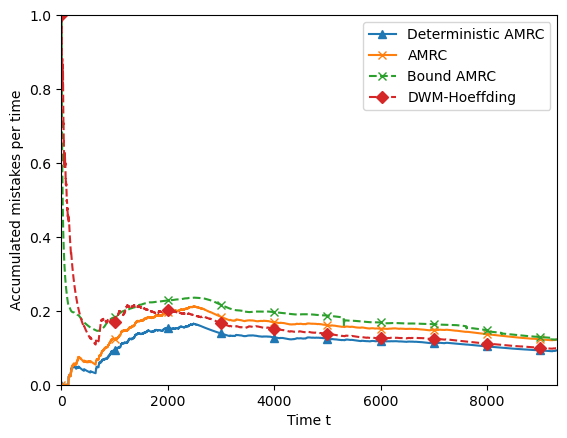

In [18]:
T = np.arange(1, mistakes_det.shape[0]+1)
plt.plot(mistakes_det.cumsum() / T, "-^", label="Deterministic AMRC", markevery=1000)
plt.plot(mistakes_ran.cumsum() / T, "-x", label="AMRC", markevery=1000)
plt.plot(bounds(RUt, delta=0.05), '--x', label="Bound AMRC", markevery=1000)
T = np.arange(1, mistakes_dwm.shape[0]+1)
plt.plot(mistakes_dwm.cumsum() / T, "--D", label="DWM-Hoeffding", markevery=1000)
plt.ylim(0, 1)
# plt.yticks([0.1, 0.4, 0.7, 1])
plt.xlim(0,T[-1])
# plt.xticks([0, 500, 1000, 1500])
plt.legend()
plt.ylabel("Accumulated mistakes per time")
plt.xlabel("Time t")
plt.savefig("spam_data.pdf")
plt.show()

In [10]:
(mistakes_det.cumsum() / T)[-1]

0.0929958167971683

In [11]:
(mistakes_ran.cumsum() / T)[-1]

0.12260002145232221